# Vorlesung 04 - Computational Thinking
**Prof. Dr.-Ing. Martin Hobelsberger, Dr. Benedikt Zönnchen**

## 1 Wörterbücher

Die letzte *built-in* Datenstruktur, welche wir besprechen, sind die sogenannten Wörterbücher (engl. [Dictionary](https://docs.python.org/3/library/stdtypes.html#dict)) ``dict``. 
Sie sind neben den Listen ``list`` die zweitwichtigste Datenstruktur in ``Python``.

Wörterbücher sind **veränderlich** (engl. mutable).
Wir können sie uns als zweispaltige Tabelle vorstellen.
Eine Spalte beinhaltet die **eindeutigen** sog. **Schlüssel** ``key``s und die andere Spalte enthält die sog. **Werte**  ``value``s.
Jede Zeile ist ein Tupel ``tuple`` aus ``key`` und ``value``.

Da die Schlüssel im Sinne der Gleichheit ``==`` eindeutig sind, kann die Spalte aus ``key``s als Menge ``set`` an **Schlüsseln** angesehen werden.
Die **Werte** müssen hingegen nicht eindeutig sein.
Sind Sie wie ich ein Freund der Mathematik, so realisiert ein Wörterbücher ``dict`` eine mathematische Funktion:

$$f : K \rightarrow V,$$

wobei $K$ die endliche Menge der Schlüssel ist.
Es kann durchaus zwei **Schlüssel** geben, die auf den gleichen **Wert** ``value`` verweisen, doch müssen die Schlüssel eindeutig sein!
Wie bei den Mengen, gilt für die **Schlüssel**, dass diese aus **unveränderlichen** Datentypen bestehen müssen.

### 1.1 Erstellung

Schlüssel: **eindeutige** Matrikelnummer, Wert: Nachname

In [2]:
students = {123451: 'Huber', 123451: 'Langer', 213131: 'Schmidt', 4131129: 'Langer'}
students

{123451: 'Langer', 213131: 'Schmidt', 4131129: 'Langer'}

Oder als Liste von Tupeln:

In [3]:
students = dict([(123451, 'Huber'), (123451, 'Langer'), (213131, 'Schmidt'), (4131129, 'Langer')])
students

{123451: 'Langer', 213131: 'Schmidt', 4131129: 'Langer'}

Oder, sofern alle Schlüssel Zeichenketten sind, durch die Argumentschreibweise:

In [4]:
rectangle = dict(shape='rectangle', x=0.0, y=1.0, width=10, height=20)
print(rectangle)

{'shape': 'rectangle', 'x': 0.0, 'y': 1.0, 'width': 10, 'height': 20}


Ein leeres Wörterbuch erzeugen wir mit:

In [6]:
empty_dirct = {}
empty_dirct

{}

### 1.2 Zugriff

Im Unterschied zu Mengen können wir auf die **Werte** ``value`` eines Wörterbuchs durch den passenden **Schlüssel** ``key`` zugreifen.
Auch hierzu verwenden wir die eckigen Klammern.
``dictionary[key]`` ergibt den ``value`` für den Schlüssel ``key`` des Wörterbuchs.

In [8]:
students = {123451: 'Huber', 123451: 'Langer', 213131: 'Schmidt', 4131129: 'Langer'}

print(f' key = {123451}, value = {students[123451]}')
print(f' key = {4131129}, value = {students[4131129]}')
print(f' key = {213131}, value = {students[213131]}')

 key = 123451, value = Langer
 key = 4131129, value = Langer
 key = 213131, value = Schmidt


Gibt es den Schlüssel nicht im Wörterbuch, so erhalten wir einen Fehler beim Zugriff.

In [9]:
print(f' key = {00000}, value = {students[00000]}')

KeyError: 0

Doch können wir stattdessen die Methode ``get(key)`` verwenden, welche ``None`` zurückgibt, falls es keinen Eintrag gibt:

In [10]:
print(f' key = {00000}, value = {students.get(00000)}')

 key = 0, value = None


### 1.3 Veränderung

Neuer Schlüssel:

In [18]:
students = dict([(123451, 'Huber'), (123451, 'Langer'), (213131, 'Schmidt'), (4131129, 'Langer')])
students[123133] = 'Fischer'
students

{123451: 'Langer', 213131: 'Schmidt', 4131129: 'Langer', 123133: 'Fischer'}

Existierender Schlüssel:

In [19]:
students[123133] = 'Alberto'
students

{123451: 'Langer', 213131: 'Schmidt', 4131129: 'Langer', 123133: 'Alberto'}

In [20]:
# no insertion and no change
ma = -123133
if ma in students:
    students[ma] = 'Hamilton'
print(students)

{123451: 'Langer', 213131: 'Schmidt', 4131129: 'Langer', 123133: 'Alberto'}


Um zwei Wörterbücher zusammenzufügen können wir die Methode ``dict1.update(dict2)`` verwenden.
Da es in einem Wörterbuch keine zwei gleichen Schlüssel gibt, wird der Eintrag in ``dict1`` durch den Eintrag in ``dict2`` verändert (update). In anderen Worten: Der Eintrag in ``dict2`` wird bevorzugt.
Zudem wird ``dict1`` verändert, d.h. es wird **keine** Kopie angelegt:

In [36]:
dict1 = {'name': 'Benedikt', 'age': 34}
dict2 = {'name': 'Martha', 'hobbys': ['Tennis', 'Klettern', 'Zeichnen']}
dict3 = dict1.update(dict2)
print(f'dict1: {dict1}')
print(f'dict2: {dict2}')
print(f'dict3: {dict3}')

dict1: {'name': 'Martha', 'age': 34, 'hobbys': ['Tennis', 'Klettern', 'Zeichnen']}
dict2: {'name': 'Martha', 'hobbys': ['Tennis', 'Klettern', 'Zeichnen']}
dict3: None


Um eine Kopie anzulegen verwenden wir den ``|``-Operator (Vereinigungs-Operator).

In [39]:
dict1 = {'name': 'Benedikt', 'age': 34}
dict2 = {'name': 'Martha', 'hobbys': ['Tennis', 'Klettern', 'Zeichnen']}
dict3 = dict1 | dict2
print(f'dict1: {dict1}')
print(f'dict2: {dict2}')
print(f'dict3: {dict3}')

dict1: {'name': 'Benedikt', 'age': 34}
dict2: {'name': 'Martha', 'hobbys': ['Tennis', 'Klettern', 'Zeichnen']}
dict3: {'name': 'Martha', 'age': 34, 'hobbys': ['Tennis', 'Klettern', 'Zeichnen']}


### 1.4 Ansichten

Wir könne uns auch alle Schlüssel und Werte eines Wörterbuchs holen.
Durch ``dictionary.keys()`` erhalten wir die Schlüssel, durch ``dictionary.values()`` die Werte, und durch ``dictionary.items()`` beide Spalten (als Liste von Tupeln):

In [24]:
students = dict([(123451, 'Huber'), (123451, 'Langer'), (213131, 'Schmidt'), (4131129, 'Langer')])
print(f'dictionary: {students}\n')
print(f'key: {students.keys()}')
print(f'values: {students.values()}')
print(f'items: {students.items()}')

dictionary: {123451: 'Langer', 213131: 'Schmidt', 4131129: 'Langer'}

key: dict_keys([123451, 213131, 4131129])
values: dict_values(['Langer', 'Schmidt', 'Langer'])
items: dict_items([(123451, 'Langer'), (213131, 'Schmidt'), (4131129, 'Langer')])


Es scheint so als wären dies alles Listen ``list``, doch das ist nicht korrekt.
Zwar werden Sie wie Listen ausgegeben, doch sind sie **unveränderlich**.

In [25]:
students = dict([(123451, 'Huber'), (123451, 'Langer'), (213131, 'Schmidt'), (4131129, 'Langer')])

values = students.values()
values[0] = 'Test'

TypeError: 'dict_values' object does not support item assignment

In [26]:
students = dict([(123451, 'Huber'), (123451, 'Langer'), (213131, 'Schmidt'), (4131129, 'Langer')])

values = students.values()

print(values)
students[123451] = 'Müller'
print(values)

dict_values(['Langer', 'Schmidt', 'Langer'])
dict_values(['Müller', 'Schmidt', 'Langer'])


### 1.5 Objektmodellierung mit Wörderbüchern

Wörterbücher sind eine Vorstufe zu sog. Objekten, welche wir durch Klassen erzeugen.
Das bedeutet wir können mit Wörterbüchern Daten von modellierten Objekten zusammenfassen.
Unser Rechteck war ein erstes Beispiel:

In [42]:
rectangle = dict(shape='rectangle', x=0.0, y=1.0, width=10, height=20)
print(rectangle)

{'shape': 'rectangle', 'x': 0.0, 'y': 1.0, 'width': 10, 'height': 20}


Wollen wir zum Beispiel Rechtecke zeichnen, könnten wir ein solches Wörterbuch verwenden um unsere Rechtecke zu beschreiben.

Folgende Funktion zeichnet Rechtecke, welche durch unsere Datenstruktur (unsere Art des Wörterbuchs) definiert ist:

In [85]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_rect(rects):
    fig, ax = plt.subplots()
    ax.plot()
    ax.set_aspect(1.0)
    
    for rect in rects:
        color = rect.get('color') if rect.get('color') != None else (0,0,0)
        x1, y1 = rect['x'], rect['y']
        width, height = rect['width'], rect['height']
        rect_patch = Rectangle((x1, y1), width, height ,color=color)
        ax.add_patch(rect_patch)

    plt.show()

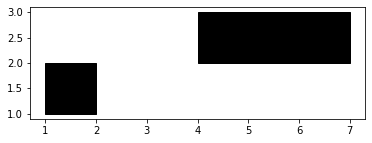

In [86]:
rect1 = dict(shape='rectangle', x=1.0, y=1.0, width=1, height=1)
rect2 = dict(shape='rectangle', x=4.0, y=2.0, width=3, height=1)
draw_rect([rect1, rect2])

Warum nicht noch eine Farbe einführen:

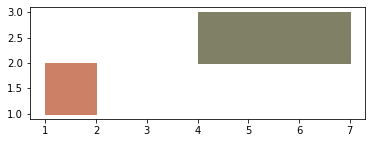

In [87]:
rect1 = dict(shape='rectangle', x=1.0, y=1.0, width=1, height=1, color=(0.8,0.5,0.4))
rect2 = dict(shape='rectangle', x=4.0, y=2.0, width=3, height=1, color=(0.5,0.5,0.4))
draw_rect([rect1, rect2])

Warum nicht viele zufällige Rechtecke zeichnen:

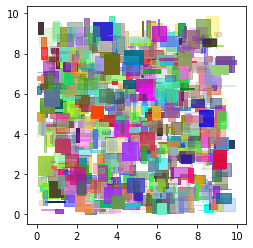

In [90]:
import random as rnd

n = 1000
max_width = 10
max_height = 10
max_size = 1
rects = []
for _ in range(n):
    x, y = rnd.random() * (max_width-max_size), rnd.random() * (max_height-max_size)
    width, height = rnd.random() * max_size, rnd.random() * max_size
    color = (rnd.random(), rnd.random(), rnd.random(), rnd.random())
    rect = dict(shape='rectangle', x=x, y=y, width=width, height=height, color=color)
    rects.append(rect)
    
draw_rect(rects)

***
***Übung 1.*** (persönliches Wörterbuch)

Füllen Sie ein Wörterbuch mit Ihren persönlichen Daten (z.B. Vorname, Nachname, Alter, Hobbys, Eigenschaften). Überlegen Sie von welchen Datentyp (``int``, ``float``, ``bool``, ``list``, ``set`` ``dict``) die jeweiligen Werte ``values`` sein sollten und warum Ihre Wahl sinnvoll ist.

***Übung 2.*** (persönliches Wörterbuch)

Geben Sie alle Schlüssel und Werte Ihres Wörterbuchs aus.
***